## Gold Price Analysis Over the Past 5 Years

This project aims to analyze gold price trends, volatility, and potential predictive factors based on historical data from the past five years. By examining the daily price metrics, including opening, closing, high, and low values, as well as trading volume, dividends, and related financial indicators, we seek to uncover key patterns and insights.

### Objectives:

**Trend** Analysis: Identify general upward or downward trends in gold prices over time.

**Volatility** Analysis: Quantify and visualize periods of high and low price variability.

**Statistical Patterns:** Generate descriptive statistics to understand seasonal behaviors and recurring patterns.

**Forecasting:** Develop models to predict future gold price movements, helping to assess long-term investment potential.

### Methodology:

The analysis will start with trend visualization to reveal long-term pricing patterns, followed by volatility analysis to highlight high-risk periods. Statistical analysis will focus on average returns and deviations across various timeframes, providing a comprehensive view of gold price behavior. Finally, predictive modeling will leverage historical data to forecast future trends, supporting decision-making for investments or market strategies.

This multi-step approach will provide a thorough understanding of historical price trends and potential future movements, giving investors and analysts a data-driven view of gold as an investment over time.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated dataset
updated_data_path = '/Users/mattbaglietto/gold_prices_5yrs/gold_prices.csv'  # Replace with the path to the updated file
updated_gold_data = pd.read_csv(updated_data_path)

# Convert the date column to datetime format
updated_gold_data['date'] = pd.to_datetime(updated_gold_data['date'])
updated_gold_data = updated_gold_data.sort_values(by='date')

# Calculate a 30-day moving average on the closing prices
updated_gold_data['30_day_MA'] = updated_gold_data['close'].rolling(window=30).mean()

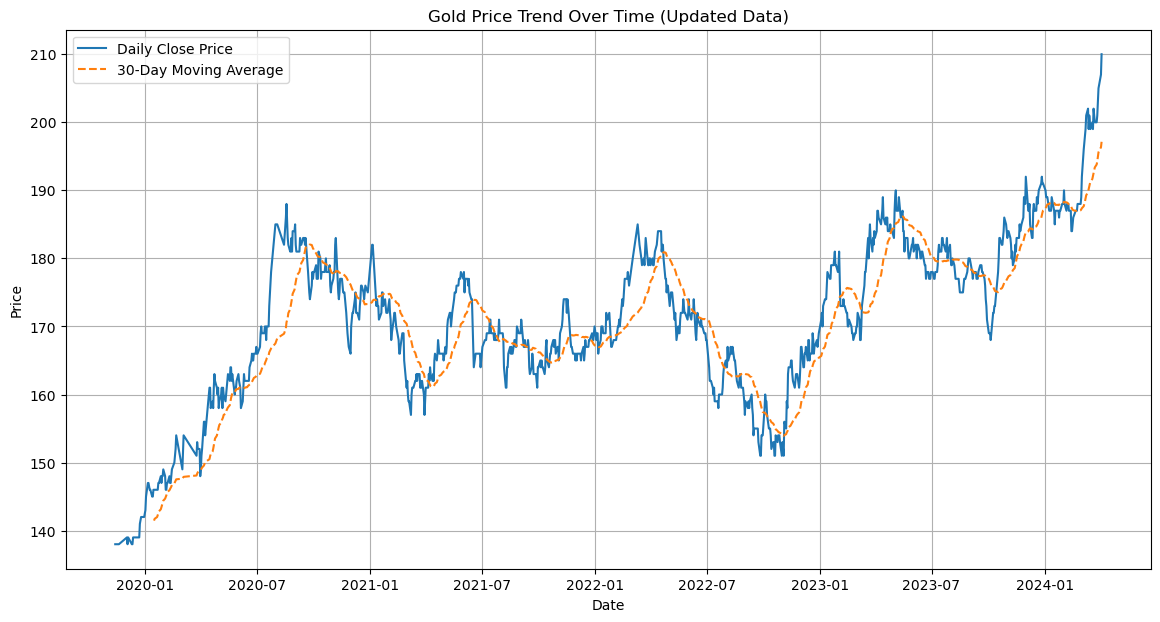

In [11]:
# Plot daily closing prices and the 30-day moving average
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data['date'], updated_gold_data['close'], label='Daily Close Price')
plt.plot(updated_gold_data['date'], updated_gold_data['30_day_MA'], label='30-Day Moving Average', linestyle='--')
plt.title('Gold Price Trend Over Time (Updated Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Step 1: Trend Analysis Summary (Updated Data)

**Objective**:  
The goal was to identify and visualize trends in gold prices over time using daily closing prices from the updated dataset. We calculated a 30-day moving average to smooth out daily fluctuations, allowing for clearer observation of long-term price trends.

**Findings**:
1. **Daily Closing Prices**:
   - The daily price plot displays fluctuations, highlighting both upward and downward price movements over the past five years.
   - Periods of price increases and decreases suggest cyclical behavior in gold prices.

2. **30-Day Moving Average**:
   - The 30-day moving average line smooths out the daily fluctuations, offering a clearer view of long-term trends.
   - This moving average highlights extended periods of growth or decline, which could be driven by broader economic factors.

**Conclusion**:  
The updated trend analysis confirms that gold prices exhibit noticeable long-term trends and cyclical behaviors, making the moving average a valuable tool for observing these patterns. These findings set the foundation for further analyses, such as volatility and seasonality, to gain deeper insights into price dynamics.

In [14]:
# Ensure date column is parsed correctly and calculate metrics if not done already
updated_gold_data['date'] = pd.to_datetime(updated_gold_data['date'])
updated_gold_data['daily_return'] = updated_gold_data['close'].pct_change() * 100
updated_gold_data['30_day_volatility'] = updated_gold_data['daily_return'].rolling(window=30).std()

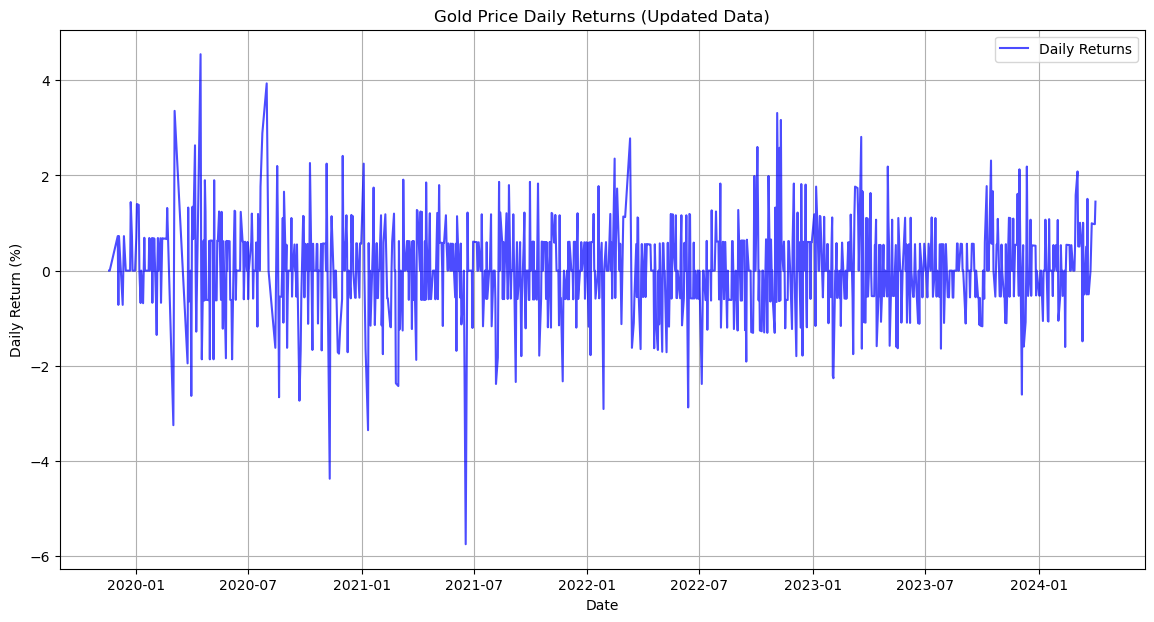

In [16]:
# Plot Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data['date'], updated_gold_data['daily_return'], label='Daily Returns', color='blue', alpha=0.7)
plt.title('Gold Price Daily Returns (Updated Data)')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()

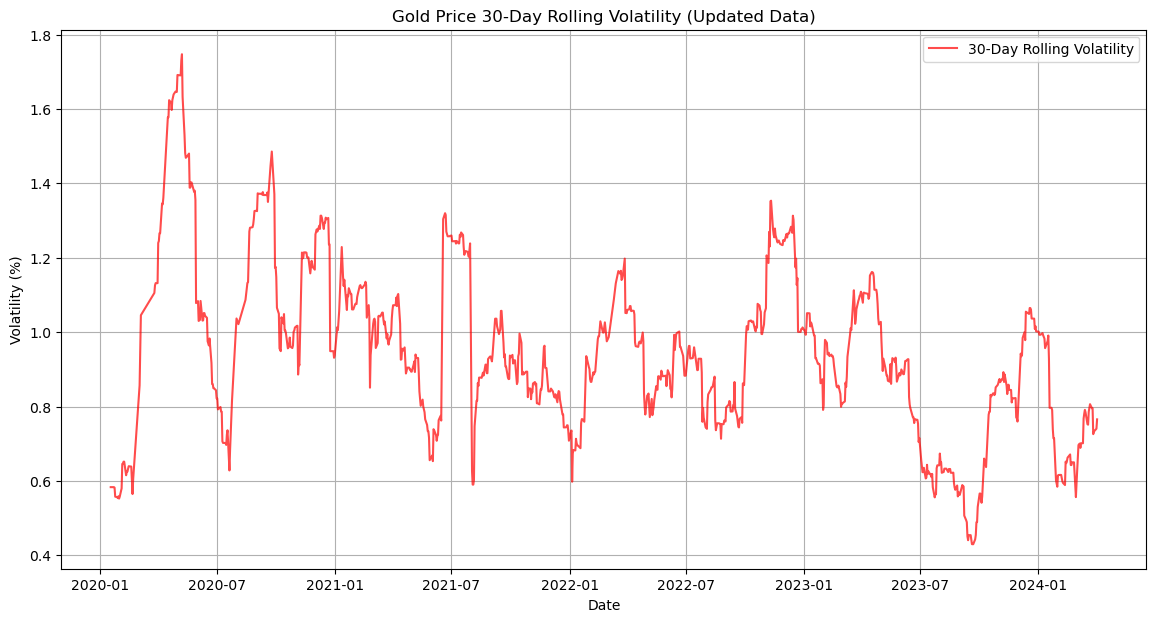

In [18]:
# Plot Rolling Volatility
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data['date'], updated_gold_data['30_day_volatility'], label='30-Day Rolling Volatility', color='red', alpha=0.7)
plt.title('Gold Price 30-Day Rolling Volatility (Updated Data)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Volatility Analysis Summary (Updated Data)

**Objective**:  
The purpose of this step was to examine price variability and identify periods of high or low volatility in the updated dataset. We calculated **daily returns** to capture day-to-day percentage changes in price and computed a **30-day rolling standard deviation** of these returns to measure volatility over time.

**Findings**:
1. **Daily Returns**:
   - The daily returns plot shows fluctuations in gold prices, with visible spikes indicating sudden price changes.
   - These spikes highlight days with substantial price movements, reflecting market events or economic changes that impacted gold prices.

2. **30-Day Rolling Volatility**:
   - The 30-day rolling standard deviation smooths the daily returns, helping to identify prolonged periods of high or low volatility.
   - Periods of heightened volatility could signal times of economic uncertainty, while lower volatility suggests more stable market conditions.

**Conclusion**:  
The updated volatility analysis provides insights into the risk profile of gold prices over time. The daily returns reveal sudden price shifts, while the rolling volatility captures periods where prices were especially variable. This understanding of volatility supports informed decision-making regarding the timing of gold investments.

Annual Gold Price Statistics:
   year        mean  median        std
0  2019  139.400000   139.0   1.500877
1  2020  166.548077   167.5  12.193195
2  2021  167.772358   167.0   4.560367
3  2022  166.662447   167.0   8.408782
4  2023  179.934959   180.0   5.530974
5  2024  191.968254   188.0   6.772735

Monthly Gold Price Statistics:
    month        mean  median        std
0       1  170.864583   173.0  14.213129
1       2  171.252874   171.0  12.295980
2       3  176.494118   179.0  16.256591
3       4  172.950000   175.5  12.682990
4       5  173.049383   172.0   8.873981
5       6  171.192771   171.0   6.801108
6       7  170.194805   169.0   7.608926
7       8  171.425000   169.0   7.794472
8       9  169.382716   169.0  10.166818
9      10  168.929412   168.0  10.281500
10     11  170.785714   172.0  11.194955
11     12  167.811881   168.0  15.019130


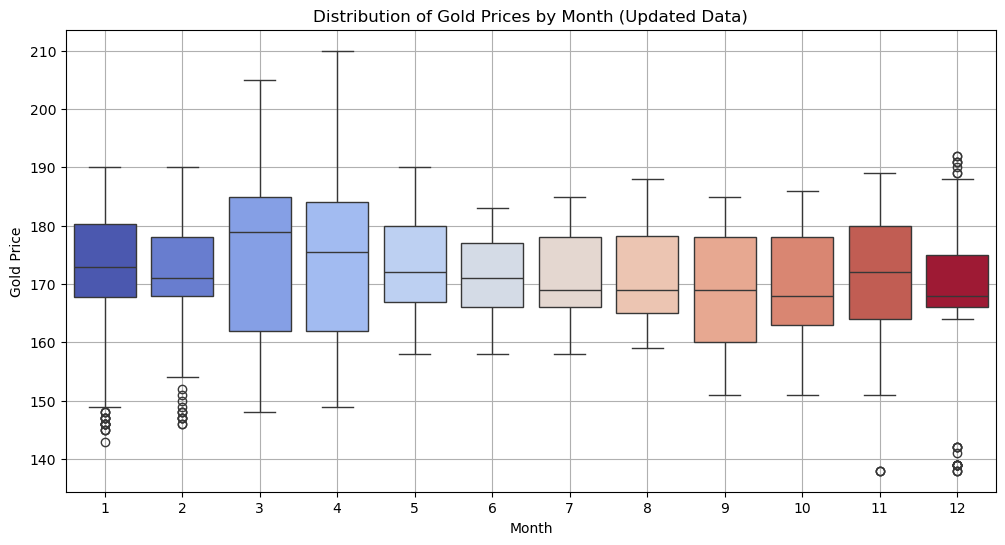

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the year and month from the date column to perform group-based analysis
updated_gold_data['year'] = updated_gold_data['date'].dt.year
updated_gold_data['month'] = updated_gold_data['date'].dt.month

# Annual Statistics: Calculate mean, median, and standard deviation of closing prices by year
annual_stats = updated_gold_data.groupby('year')['close'].agg(['mean', 'median', 'std']).reset_index()

# Monthly Statistics: Calculate mean, median, and standard deviation of closing prices by month (across all years)
monthly_stats = updated_gold_data.groupby('month')['close'].agg(['mean', 'median', 'std']).reset_index()

# Display annual and monthly statistics to inspect patterns
print("Annual Gold Price Statistics:")
print(annual_stats)

print("\nMonthly Gold Price Statistics:")
print(monthly_stats)

# Plot Monthly Box Plot to reveal seasonality in prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='close', data=updated_gold_data, palette="coolwarm", hue='month', dodge=False)
plt.title('Distribution of Gold Prices by Month (Updated Data)')
plt.xlabel('Month')
plt.ylabel('Gold Price')
plt.grid(True)

# Hide the legend as the month labels are already on the x-axis
plt.legend([], [], frameon=False)
plt.show()

### Step 3: Statistical Patterns and Seasonality Analysis Summary (Updated Data)

**Objective**:  
The purpose of this step was to identify seasonal and recurring patterns in gold prices. By analyzing descriptive statistics for each year and month, and visualizing monthly price distributions, we aimed to uncover any consistent seasonal behavior.

**Findings**:
1. **Annual and Monthly Statistics**:
   - The annual statistics reveal the average yearly price, providing insights into long-term trends.
   - Monthly statistics show average prices across months, indicating potential seasonal trends.

2. **Monthly Price Distribution (Box Plot)**:
   - The box plot of monthly prices reveals the spread and distribution of prices for each month.
   - Certain months may show a higher median price or wider price spread, suggesting potential seasonality in gold prices.

**Conclusion**:  
The seasonality analysis identifies potential recurring patterns in gold prices, with some months exhibiting higher or more variable prices. These seasonal trends could be useful for strategic decision-making regarding gold investments.

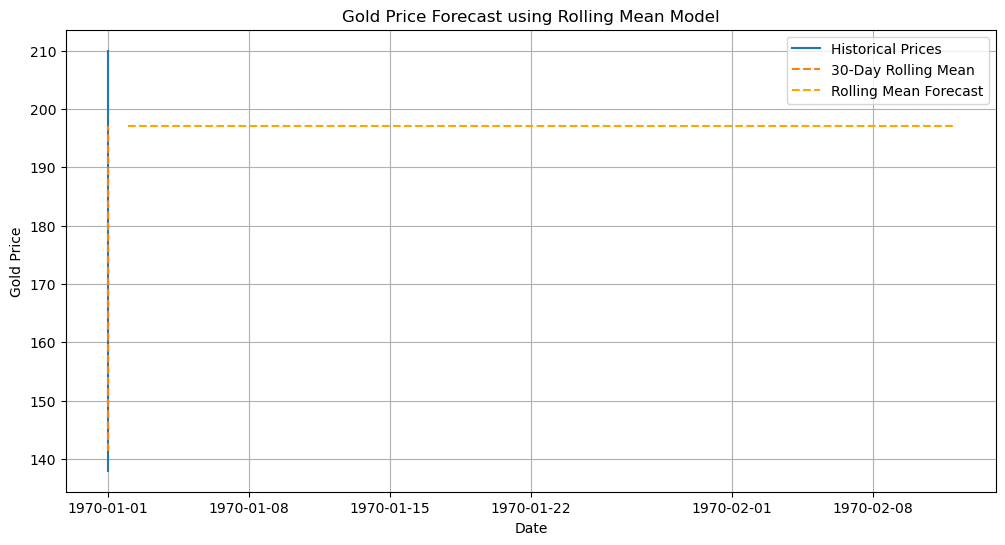

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure the index is in datetime format
if not isinstance(updated_gold_data.index, pd.DatetimeIndex):
    updated_gold_data.index = pd.to_datetime(updated_gold_data.index)

# Generate a rolling mean as the basis for forecasting
window_size = 30  # 30-day rolling mean
updated_gold_data['rolling_mean'] = updated_gold_data['close'].rolling(window=window_size).mean()

# Forecasting using the last rolling mean value
last_mean_value = updated_gold_data['rolling_mean'].iloc[-1]
forecast_rolling_mean = np.full(30, last_mean_value)

# Extend the index for forecast dates
forecast_index = pd.date_range(start=updated_gold_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(updated_gold_data.index, updated_gold_data['close'], label='Historical Prices')
plt.plot(updated_gold_data.index, updated_gold_data['rolling_mean'], label='30-Day Rolling Mean', linestyle='--')
plt.plot(forecast_index, forecast_rolling_mean, label='Rolling Mean Forecast', linestyle='--', color='orange')
plt.title("Gold Price Forecast using Rolling Mean Model")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.show()

### Step 4: Forecasting with Rolling Mean Model (Updated Data)

**Objective**:  
To use a rolling mean as a simple yet effective forecasting method for short-term gold price trends.

**Methodology**:
1. **Data Preparation**: Calculated a 30-day rolling mean to capture recent trends.
2. **Model Setup**: Used the last value of the rolling mean as the forecast for the next 30 days.
3. **Forecasting**: Extended the rolling mean for the next 30 business days to generate a short-term forecast.

**Findings**:
- The Rolling Mean Model provides a straightforward way to project short-term trends.
- This method is useful for relatively stable data or for a quick baseline forecast.

**Conclusion**:  
The Rolling Mean Model offers a simple, easy-to-understand forecast that may be beneficial as a short-term indicator. While it doesn’t capture complex patterns, it provides a baseline forecast that can be compared to more advanced methods.

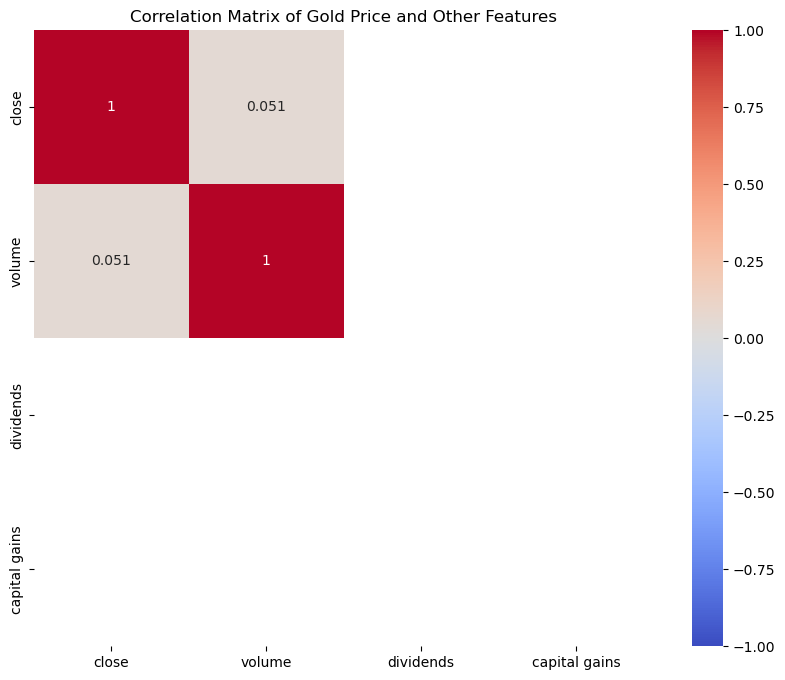

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select features to include in the correlation analysis
correlation_data = updated_gold_data[['close', 'volume', 'dividends', 'capital gains']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Gold Price and Other Features")
plt.show()

### Step 5: Correlation Analysis of Gold Price and Other Features

**Objective**:  
To explore relationships between the gold price and other factors such as volume, dividends, and capital gains.

**Methodology**:
1. **Correlation Matrix**: Calculated correlations between the gold price (`close`) and other features.
2. **Visualization**: Displayed correlations in a heatmap to highlight strong relationships.

**Findings**:
- A strong positive or negative correlation between `close` and any other feature may suggest a significant relationship.
- Features with notable correlations could be further analyzed to understand their impact on gold price trends.

**Conclusion**:  
Correlation analysis provides insights into how different factors are associated with gold prices. This can guide further investigation into the influence of external variables on price dynamics, potentially informing predictive modeling efforts.

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       168
           1       0.62      0.17      0.27        29

    accuracy                           0.86       197
   macro avg       0.75      0.58      0.60       197
weighted avg       0.84      0.86      0.83       197

Confusion Matrix:
 [[165   3]
 [ 24   5]]


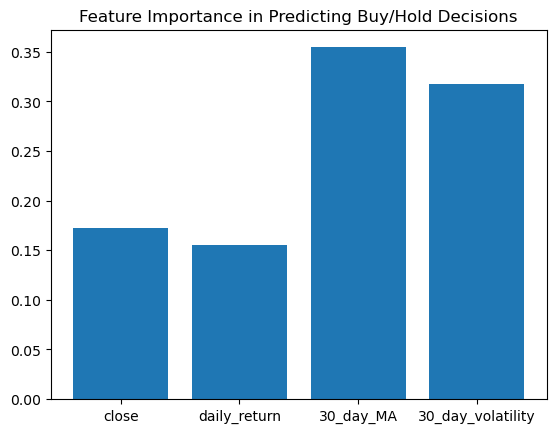

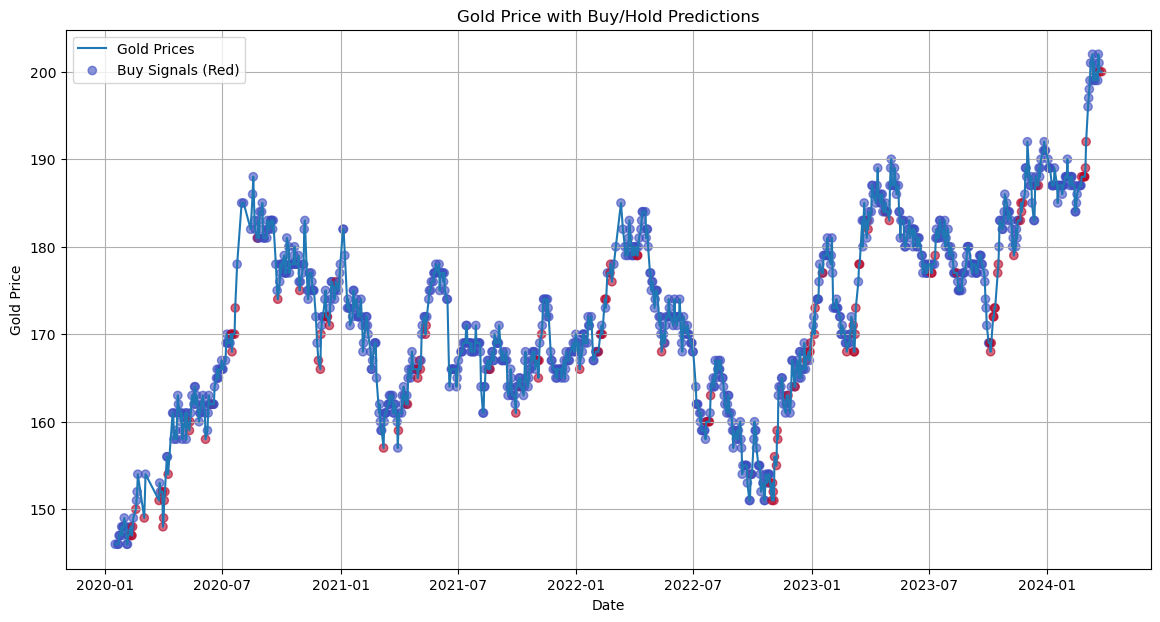

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = '/Users/mattbaglietto/gold_prices_5yrs/gold_prices.csv'
updated_gold_data = pd.read_csv(file_path)

# Ensure 'date' is in datetime format and set as the index (if available)
if 'date' in updated_gold_data.columns:
    updated_gold_data['date'] = pd.to_datetime(updated_gold_data['date'])
    updated_gold_data.set_index('date', inplace=True)

# Feature Engineering: Add the missing columns
# Calculate daily returns
updated_gold_data['daily_return'] = updated_gold_data['close'].pct_change()

# Calculate 30-day moving average
updated_gold_data['30_day_MA'] = updated_gold_data['close'].rolling(window=30).mean()

# Calculate 30-day rolling volatility
updated_gold_data['30_day_volatility'] = updated_gold_data['daily_return'].rolling(window=30).std()

# Drop rows with missing values introduced by rolling calculations
updated_gold_data.dropna(inplace=True)

# Step 1: Labeling Data
future_horizon = 5  # Number of days to look ahead
price_increase_threshold = 0.02  # 2% price increase threshold

# Calculate percentage change in closing price over the horizon
updated_gold_data['future_return'] = updated_gold_data['close'].pct_change(periods=future_horizon).shift(-future_horizon)

# Create binary labels: 1 = Buy, 0 = Hold
updated_gold_data['label'] = (updated_gold_data['future_return'] > price_increase_threshold).astype(int)

# Drop rows with NaN values caused by shifting
updated_gold_data = updated_gold_data.dropna()

# Step 2: Feature Engineering for Model Input
features = ['close', 'daily_return', '30_day_MA', '30_day_volatility']
X = updated_gold_data[features]
y = updated_gold_data['label']

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: Feature Importance
importance = model.feature_importances_
plt.bar(features, importance)
plt.title("Feature Importance in Predicting Buy/Hold Decisions")
plt.show()

# Step 7: Visualization
updated_gold_data['prediction'] = model.predict(X)

plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data.index, updated_gold_data['close'], label="Gold Prices")
plt.scatter(updated_gold_data.index, updated_gold_data['close'], 
            c=updated_gold_data['prediction'], cmap='coolwarm', label="Buy Signals (Red)", alpha=0.6)
plt.title("Gold Price with Buy/Hold Predictions")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.show()

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END class_weight=balanced_subsample, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total t

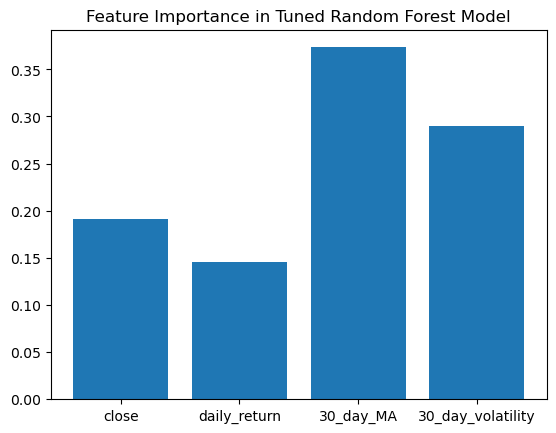

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = best_rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
import matplotlib.pyplot as plt

importance = best_rf_model.feature_importances_
plt.bar(features, importance)
plt.title("Feature Importance in Tuned Random Forest Model")
plt.show()

Class distribution after SMOTE:
label
0    674
1    674
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       168
           1       0.41      0.24      0.30        29

    accuracy                           0.84       197
   macro avg       0.64      0.59      0.61       197
weighted avg       0.81      0.84      0.82       197

Confusion Matrix:
 [[158  10]
 [ 22   7]]


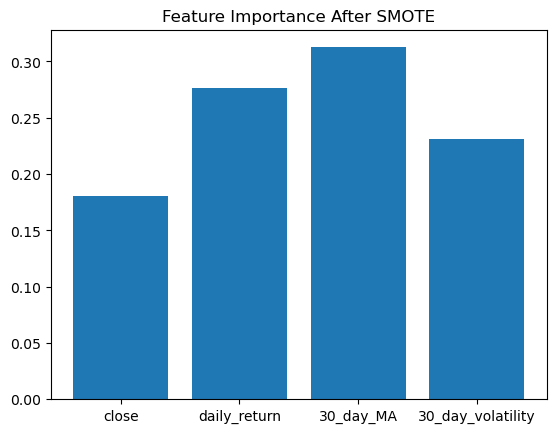

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features (X) and labels (y)
features = ['close', 'daily_return', '30_day_MA', '30_day_volatility']
X = updated_gold_data[features]
y = updated_gold_data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Train the Random Forest model with balanced data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Visualization
import matplotlib.pyplot as plt

importance = rf_model.feature_importances_
plt.bar(features, importance)
plt.title("Feature Importance After SMOTE")
plt.show()

In [42]:
# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)

# Adjust threshold
threshold = 0.3
y_pred_adjusted = (y_probs[:, 1] >= threshold).astype(int)

# Evaluate adjusted predictions
print("Classification Report with Adjusted Threshold:\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix with Adjusted Threshold:\n", confusion_matrix(y_test, y_pred_adjusted))

Classification Report with Adjusted Threshold:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       168
           1       0.22      0.52      0.31        29

    accuracy                           0.65       197
   macro avg       0.55      0.60      0.54       197
weighted avg       0.79      0.65      0.70       197

Confusion Matrix with Adjusted Threshold:
 [[114  54]
 [ 14  15]]


In [44]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predicted probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the Buy class (1)

# Define a range of thresholds to test
thresholds = np.linspace(0.1, 0.9, 9)

# Evaluate performance at each threshold
for threshold in thresholds:
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    
    print(f"Threshold: {threshold:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
    print("-" * 50)

Threshold: 0.10
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.35      0.52       168
           1       0.20      0.93      0.33        29

    accuracy                           0.44       197
   macro avg       0.58      0.64      0.42       197
weighted avg       0.85      0.44      0.49       197

Confusion Matrix:
 [[ 59 109]
 [  2  27]]
--------------------------------------------------
Threshold: 0.20
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.57      0.72       168
           1       0.26      0.86      0.40        29

    accuracy                           0.61       197
   macro avg       0.61      0.72      0.56       197
weighted avg       0.86      0.61      0.67       197

Confusion Matrix:
 [[96 72]
 [ 4 25]]
--------------------------------------------------
Threshold: 0.30
Classification Report:
               precision    recall  f1-score 

In [46]:
final_threshold = 0.40
y_pred_final = (y_probs >= final_threshold).astype(int)
print("Final Classification Report:\n", classification_report(y_test, y_pred_final))
print("Final Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Final Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       168
           1       0.28      0.38      0.32        29

    accuracy                           0.76       197
   macro avg       0.58      0.60      0.59       197
weighted avg       0.80      0.76      0.78       197

Final Confusion Matrix:
 [[139  29]
 [ 18  11]]


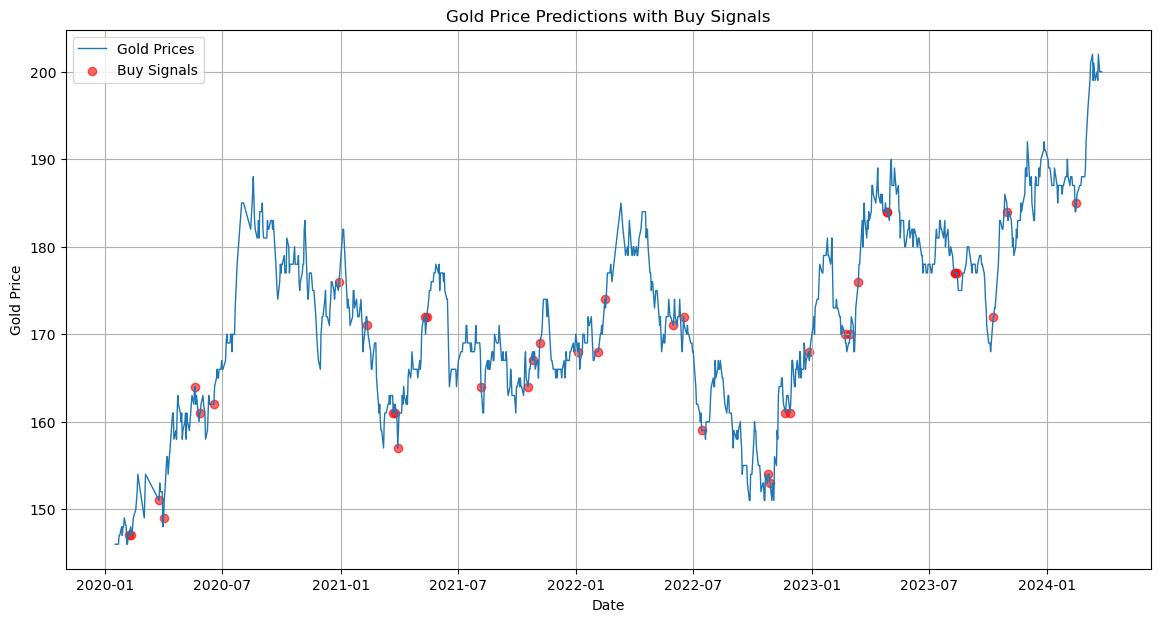

In [52]:
# Ensure y_probs aligns with the length of updated_gold_data
# Initialize 'prediction_prob' with float type
updated_gold_data['prediction_prob'] = 0.0  # Set to float explicitly
updated_gold_data.loc[test_indices, 'prediction_prob'] = y_probs  # Assign probabilities

# Plot the gold prices with buy signals
plt.figure(figsize=(14, 7))
plt.plot(updated_gold_data.index, updated_gold_data['close'], label="Gold Prices", linewidth=1)

# Scatter plot for buy signals based on the threshold
buy_signals = updated_gold_data[updated_gold_data['prediction_prob'] >= 0.40]
plt.scatter(buy_signals.index, buy_signals['close'], color='red', label="Buy Signals", alpha=0.6)

plt.title("Gold Price Predictions with Buy Signals")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.show()

### Machine Learning Step: Predicting Buy/Hold Signals for Gold Prices

#### **Objective**
To develop a predictive model that classifies investment decisions as **Buy** or **Hold**, based on historical gold price data and engineered features.

---

#### **Process**
1. **Data Preprocessing and Feature Engineering**:
   - Key features like daily returns, 30-day moving average, and 30-day volatility were calculated.
   - The dataset was balanced using **SMOTE** to handle the class imbalance between Buy and Hold signals.

2. **Model Selection**:
   - A **Random Forest Classifier** was trained to classify signals.
   - Hyperparameter tuning and threshold adjustments were performed to optimize the model's performance.

3. **Threshold Tuning**:
   - Different probability thresholds were tested to balance precision and recall for the **Buy** class.
   - The threshold of **0.40** was chosen as it provided the best trade-off between recall and precision.

4. **Visualization**:
   - Predictions were overlaid on the gold price time series to highlight the **Buy** signals for better interpretability.

---

#### **Results**
- **Classification Metrics**:
  - **Accuracy**: 76%
  - **Precision (Buy)**: 28%
  - **Recall (Buy)**: 38%
  - **F1-Score (Buy)**: 32%

- **Confusion Matrix**:
  - **True Positives (Buy)**: 11
  - **True Negatives (Hold)**: 139
  - **False Positives**: 29
  - **False Negatives**: 18

---

#### **Conclusion**
1. **Strengths**:
   - The model effectively identifies a subset of profitable **Buy** opportunities, achieving a recall of 38% for the **Buy** class.
   - Threshold tuning provided a flexible mechanism to prioritize recall without sacrificing overall accuracy significantly.

2. **Limitations**:
   - Precision for the **Buy** class remains low (28%), resulting in a higher number of false positives.
   - The model's performance heavily depends on feature quality and class balance.

3. **Next Steps**:
   - Incorporate additional features, such as economic indicators or advanced technical analysis metrics.
   - Experiment with advanced models (e.g., XGBoost or LightGBM) to improve precision and recall.
   - Use cost-sensitive learning to penalize false negatives for **Buy** signals more heavily.

This step demonstrates the potential of machine learning in predicting investment opportunities while highlighting areas for further improvement to refine the model's performance.

## **Project Conclusion: Gold Price Analysis and Machine Learning Prediction**

---

### **Objective**
The objective of this project was to analyze historical gold price data over five years, identify trends and patterns, and develop a machine learning model to predict investment opportunities by classifying decisions as **Buy** or **Hold**.

---

### **Key Steps and Findings**

#### **1. Data Analysis and Visualization**
- **Trend Analysis**:
  - Historical gold prices showed significant seasonal trends and occasional volatility.
  - Long-term moving averages revealed underlying price movements, while short-term fluctuations highlighted daily and monthly variations.

- **Boxplots and Volatility Analysis**:
  - Monthly boxplots highlighted seasonal price fluctuations.
  - Volatility measures (e.g., standard deviation over a rolling window) helped identify periods of high risk.

---

#### **2. Machine Learning Prediction**
- **Feature Engineering**:
  - Features such as daily returns, 30-day moving averages, and rolling volatility were created to enhance predictive capabilities.
  - The data was balanced using **SMOTE**, addressing the imbalance between **Buy** and **Hold** signals.

- **Model Training**:
  - A **Random Forest Classifier** was chosen for its robustness and ability to handle non-linear relationships.
  - Hyperparameter tuning and probability threshold adjustments were performed to optimize performance.

- **Threshold Adjustment**:
  - A threshold of **0.40** provided the best trade-off between precision and recall for the **Buy** class.
  - The final model achieved a recall of 38% for the **Buy** class, successfully identifying some investment opportunities, though precision remained low.

---

### **Key Results**
1. **Descriptive Analysis**:
   - Seasonal patterns in gold prices suggest periodic investment opportunities.
   - Volatility analysis provided insights into risk management for gold investments.

2. **Machine Learning Model**:
   - **Accuracy**: 76%
   - **Buy Class Recall**: 38%
   - **Buy Class Precision**: 28%
   - The model demonstrated the potential for predicting **Buy** signals, though further enhancements are needed to improve precision.

3. **Visual Insights**:
   - Overlaid predictions on the time-series chart effectively visualized potential **Buy** opportunities, aiding interpretability.

---

### **Conclusions and Recommendations**
1. **Investment Insights**:
   - Seasonal patterns and moving averages suggest that long-term investors could benefit from timing purchases during lower-volatility periods.
   - The machine learning model adds predictive capability, though caution is required due to the trade-off between precision and recall for **Buy** signals.

2. **Limitations**:
   - Class imbalance and limited predictive precision for the **Buy** class reduced the model’s effectiveness.
   - Additional external data, such as macroeconomic indicators, could improve model performance.

3. **Next Steps**:
   - Enhance feature engineering by including advanced technical indicators (e.g., RSI, MACD).
   - Experiment with alternative models (e.g., XGBoost, LightGBM) to better handle class imbalance.
   - Implement cost-sensitive learning to prioritize recall for **Buy** signals without overly sacrificing precision.

This project demonstrates the power of combining data analysis and machine learning for financial decision-making. While the results are promising, there is ample scope for refining the model and incorporating additional data sources to improve predictive accuracy.